In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

df = pd.read_csv(r'C:\Users\ACER\Downloads\movies.csv')

In [17]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [18]:
df.shape

(7668, 15)

In [4]:
#Check the data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#Check the missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


Data Cleaning: Identify variables that are essential for determining a movie’s commercial success and remove movies that miss these variables. Discuss why you decide to remove missing values for these variables.

To determine a movie's commercial success, it's essential to compare the budget with its gross. Besides, the score and votes reveal the quality of a movie. I will remove all the movies that have missing data in these 4 columns: budget, gross, score and votes.

In [7]:
df.dropna(subset=['budget','gross','score','votes'],inplace=True)
df.shape

(5436, 15)

In [9]:
print('This is data of movies from year',df.year.min(),'to',df.year.max())

This is data of movies from year 1980 to 2020


In [12]:
#Top 5 movie with the biggest budget
df.sort_values(by = 'budget', ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000.0,1.332699e+09,Walt Disney Pictures,152.0
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000.0,9.609965e+08,Walt Disney Pictures,169.0


In [11]:
#Top 5 movie with the biggest gross
df.sort_values(by = 'gross', ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [19]:
#Top 5 most profitable movies
df['revenue']=df.apply(lambda x: x['gross'] - x['budget'], axis=1)
df.sort_values(by='revenue',ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,revenue
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2.610246e+09
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2.441501e+09
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,2.001647e+09
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,1.824522e+09
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,1.727360e+09


Text(0.5, 1.0, 'Revenue by Genre of Movies')

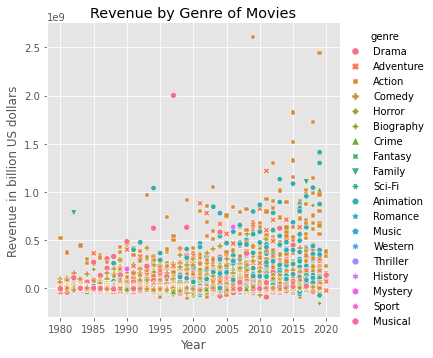

In [21]:
#Revenue by genre of movies through years
sns.relplot(data=df,x='year',y='revenue',hue='genre',style='genre')
plt.xlabel('Year')
plt.ylabel('Revenue in billion US dollars')
plt.title('Revenue by Genre of Movies')

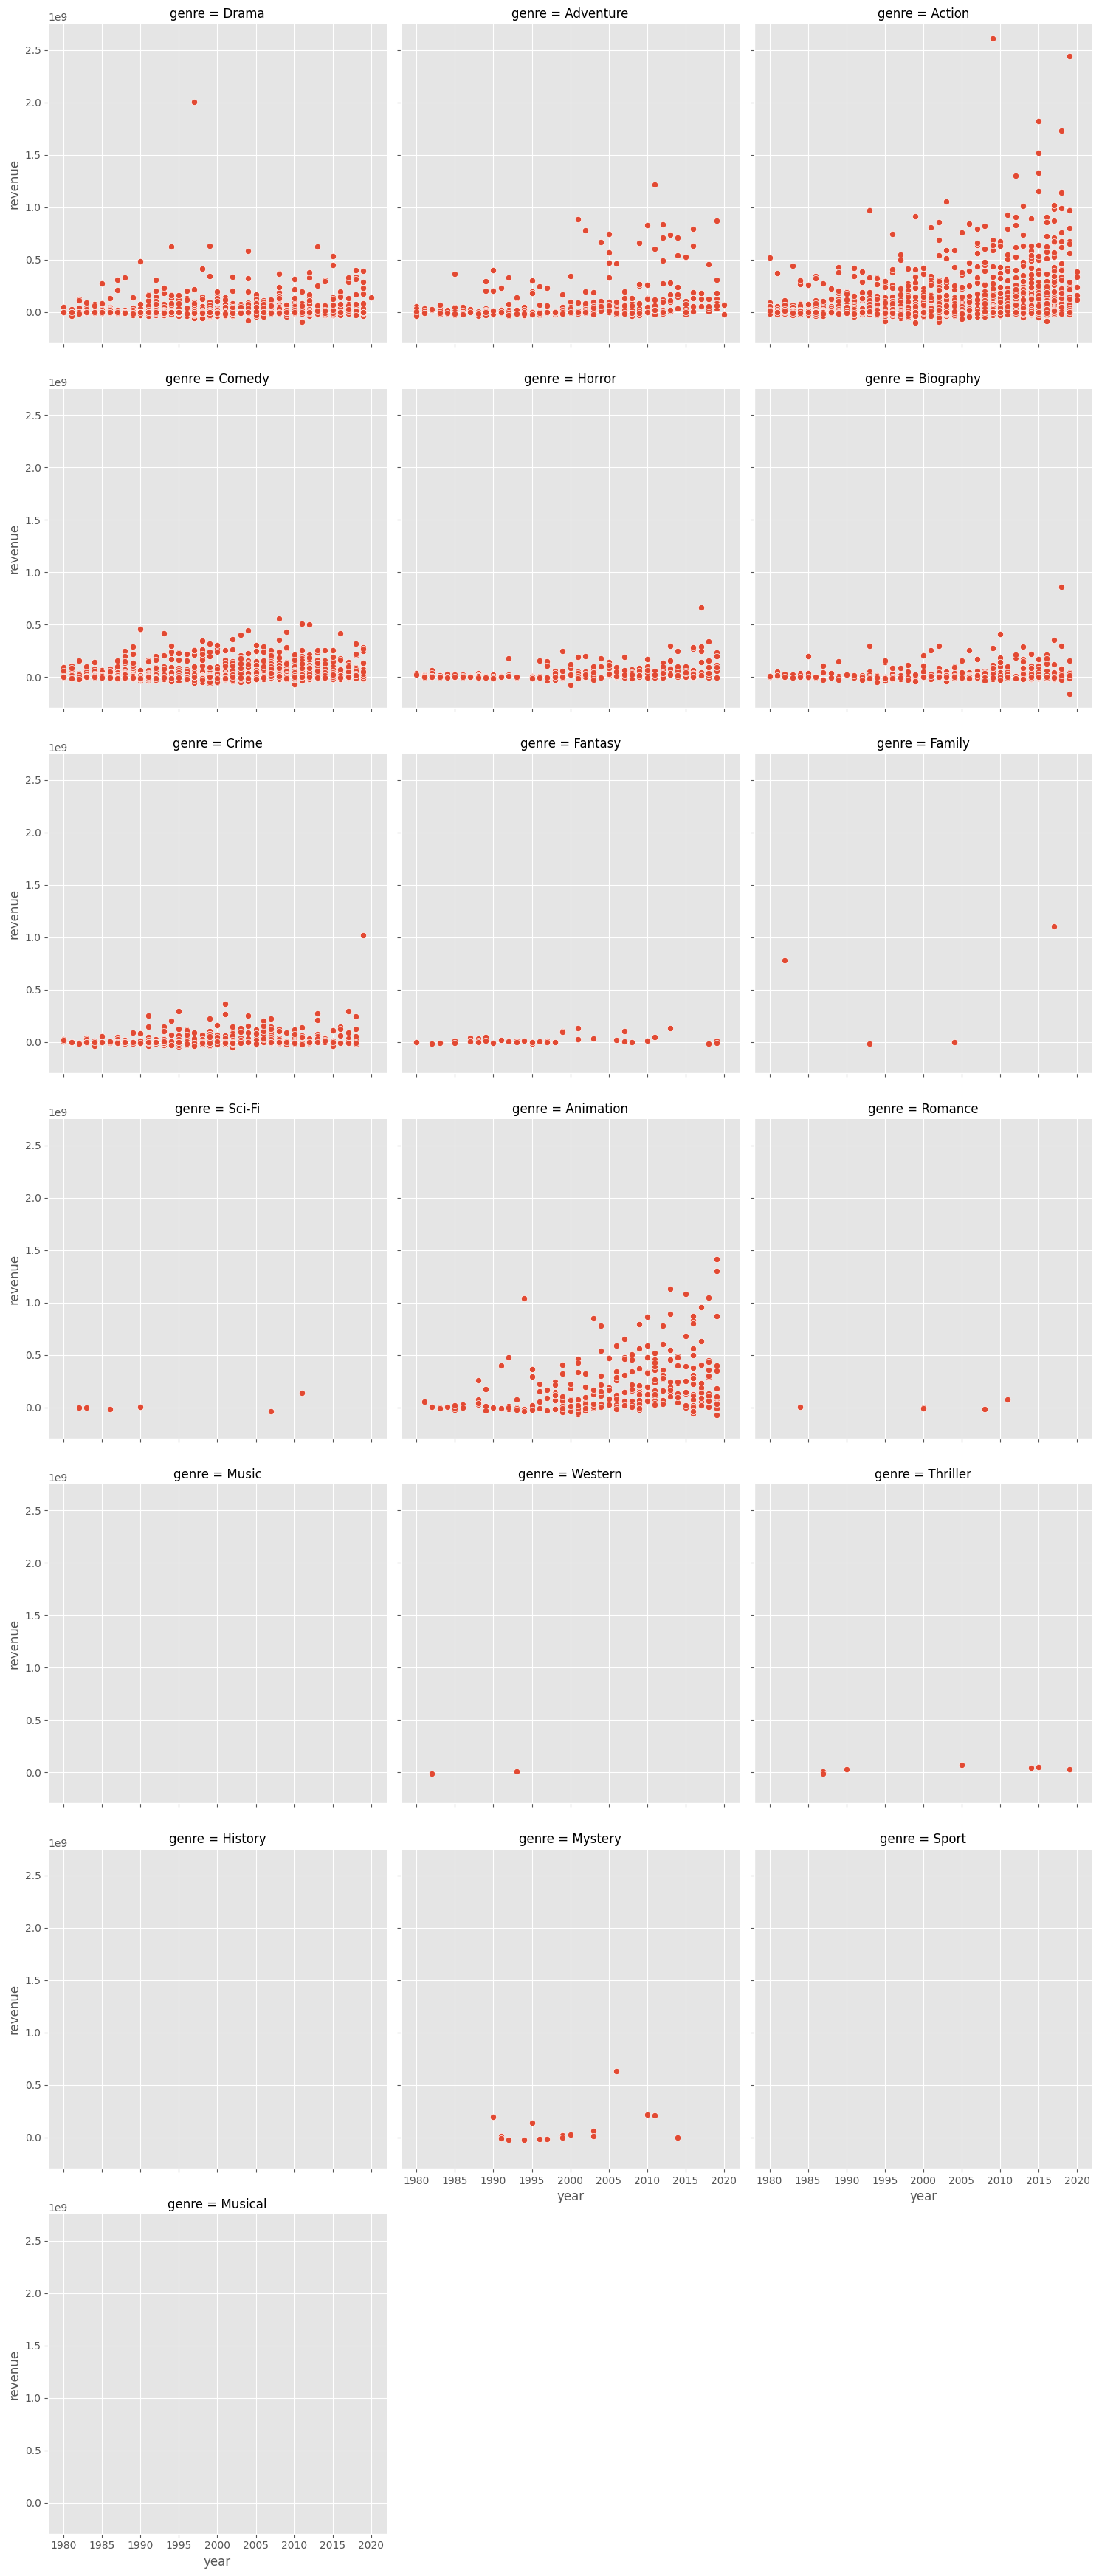

In [22]:
#Details for revenue by genre of movies through years
sns.relplot(data=df,x='year',y='revenue',col='genre',col_wrap=3)

In [23]:
#Number of movies produced from 1980 to 2020
df_genre = df.groupby(by='genre', as_index=False).agg({'name': pd.Series.nunique})
df_genre = df_genre.sort_values(by=['name'], ascending=False)
df_genre.rename(columns = {'name':'number of movies'}, inplace = True)
df_genre

,genre,number of movies
4,Comedy,2228
0,Action,1674
6,Drama,1498
5,Crime,548
3,Biography,443
1,Adventure,426
2,Animation,336
10,Horror,311
8,Fantasy,44
13,Mystery,20


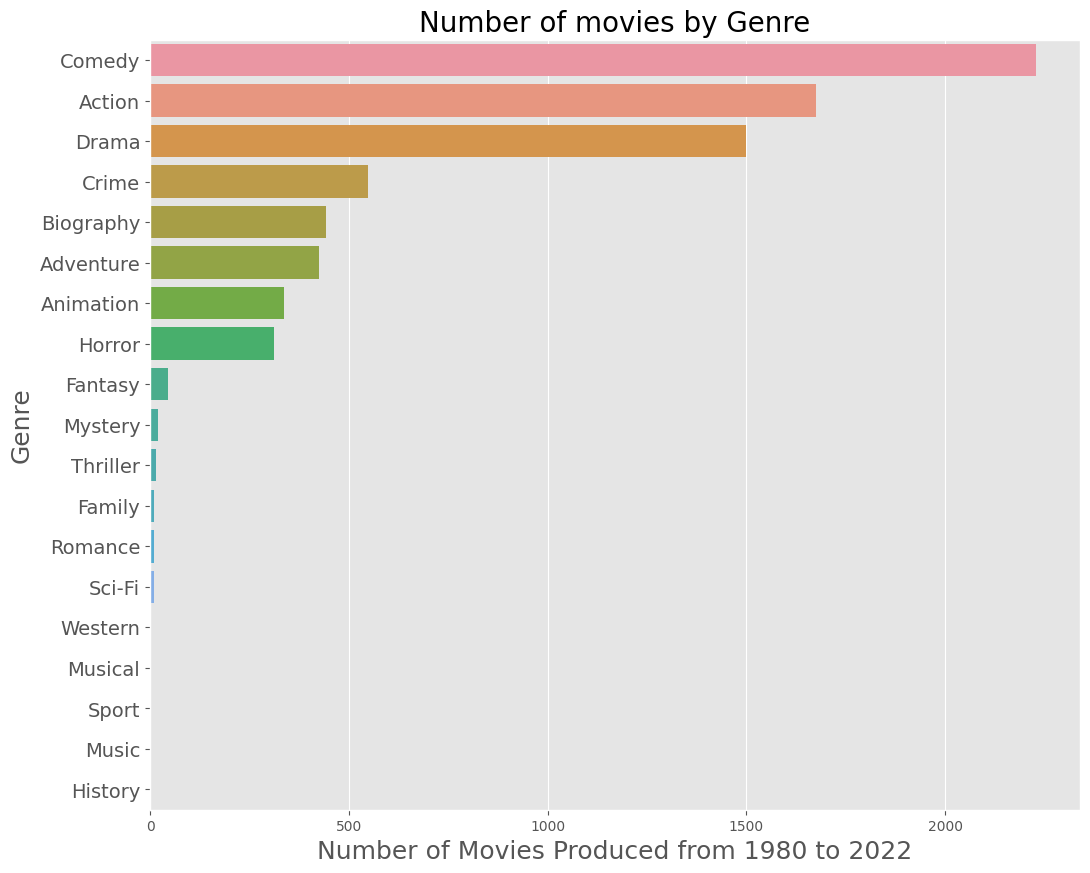

In [24]:
plt.figure(figsize=(12,10))

sns.barplot(x = 'number of movies', y = 'genre', data = df_genre )
plt.title("Number of movies by Genre", fontsize=20)
plt.xlabel("Number of Movies Produced from 1980 to 2022", fontsize=18)
plt.ylabel("Genre", fontsize=18)
plt.yticks(fontsize=14)
plt.show()

In [26]:
#Movie with the lowest revenue
df.loc[df.revenue<0].head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,revenue
21,Heaven's Gate,R,Adventure,1980,"April 24, 1981 (United States)",6.8,14000.0,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000.0,3484523.0,Partisan Productions,219.0,-40515477.0
33,Cattle Annie and Little Britches,PG,Drama,1980,"April 24, 1981 (United States)",6.1,604.0,Lamont Johnson,David Eyre,Scott Glenn,United States,5100000.0,534816.0,Cattle Annie Productions,97.0,-4565184.0
46,The Island,R,Action,1980,"June 13, 1980 (United States)",5.3,3900.0,Michael Ritchie,Peter Benchley,Michael Caine,United States,22000000.0,15716828.0,Universal Pictures,109.0,-6283172.0
48,The Nude Bomb,PG,Action,1980,"May 9, 1980 (United States)",5.1,3100.0,Clive Donner,Mel Brooks,Don Adams,United States,15000000.0,14662035.0,Universal Pictures,94.0,-337965.0
51,Melvin and Howard,R,Comedy,1980,"September 19, 1980 (United States)",6.8,4500.0,Jonathan Demme,Bo Goldman,Paul Le Mat,United States,7000000.0,4309490.0,Universal Pictures,95.0,-2690510.0
56,When Time Ran Out...,PG,Action,1980,"March 28, 1980 (United States)",4.6,2600.0,James Goldstone,Gordon Thomas,Paul Newman,United States,20000000.0,3763988.0,International Cinema,121.0,-16236012.0
77,Willie & Phil,R,Comedy,1980,"August 15, 1980 (United States)",5.9,415.0,Paul Mazursky,Jean Gruault,Michael Ontkean,United States,5500000.0,4400000.0,Twentieth Century Fox,115.0,-1100000.0
80,Phobia,R,Drama,1980,"September 9, 1980 (United States)",4.0,546.0,John Huston,Gary Sherman,Paul Michael Glaser,Canada,5100000.0,59167.0,Borough Park Productions,94.0,-5040833.0
98,Blow Out,R,Crime,1981,"July 24, 1981 (United States)",7.4,47000.0,Brian De Palma,Brian De Palma,John Travolta,United States,18000000.0,12000000.0,Filmways Pictures,108.0,-6000000.0
128,Dragonslayer,PG,Action,1981,"June 26, 1981 (United States)",6.7,16000.0,Matthew Robbins,Hal Barwood,Peter MacNicol,United Kingdom,18000000.0,14110013.0,Paramount Pictures,109.0,-3889987.0


As we can see, most of the movies with lowest revenue have rating: R – Restricted (Under 17 requires accompanying parent or adult guardian. Contains some adult material. Parents are urged to learn more about the film before taking their young children with them) and PG – Parental Guidance Suggested (Some material may not be suitable for children. Parents urged to give "parental guidance". May contain some material parents might not like for their young children)

While the movies with highest revenue have rating: PG-13 – Parents Strongly Cautioned (Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers)

The bottom revenued ones limited their audiences themself by the rating, of course the score of a movie is an important factor that impacts the quantity of viewers too. Now I am going to visualize the revenue by rating through years and the revenue by score of movies will be following.

In [28]:
df.rating.unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [29]:
pip install hvplot

     ---------------------------------------- 3.1/3.1 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 18.5/18.5 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 4.5 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 KB 8.8 MB/s eta 0:00:00
     ---------------------------------------- 85.7/85.7 KB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 15.6/15.6 MB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 42.8/42.8 KB ? eta 0:00:00
     ---------------------------------------- 97.8/97.8 KB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 63.1/63.1 KB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 78.4/78.4 KB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 61.2/61.2 KB ? eta 0:00:00
     -------------------------------------- 149.2/149.2 KB 4

You should consider upgrading via the 'C:\Users\ACER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [30]:
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

In [32]:
df=df.interactive()
year_slider=pn.widgets.IntSlider(name='Year slider',start=1980,end=2020,step=5,value=2000)
year_slider

IntSlider(end=2020, name='Year slider', start=1980, step=5, value=2000)

In [33]:
yaxis_revenue=pn.widgets.RadioButtonGroup(name='Y axis',options=['revenue','budget',],button_type='success')
rate=['R', 'PG', 'G', 'NC-17', 'Approved', 'Not Rated', 'PG-13','Unrated', 'X', 'TV-MA']
revenue_pipeline=(df[(df.year<=year_slider) & (df.rating.isin(rate))].groupby(['rating','year'])[yaxis_revenue].mean().to_frame().reset_index().sort_values(by='year').reset_index(drop=True))
revenue_plot=revenue_pipeline.hvplot(x='year',by='rating',y=yaxis_revenue,line_width=2,title='Revenue by Rating of movies')
revenue_plot

In [34]:
revenue_table=revenue_pipeline.pipe(pn.widgets.Tabulator,pagination='remote',page_size=10,sizing_mode='stretch_width')
revenue_table

In [35]:
revenue_score_pipeline=(df[df.year==year_slider].groupby(['rating','year','score'])['revenue'].mean().to_frame().reset_index().sort_values(by='year').reset_index(drop=True))
revenue_score_scatterplot=revenue_score_pipeline.hvplot(x='revenue',y='score',by='rating',size=80,kind='scatter',alpha=0.7,legend=False,height=500,width=500)
revenue_score_scatterplot

A movie is considered commercial successful according to its revenue. In order to reach the highest gross, the producers and directors need to do the research on the market to figure out what kind of movies will make people pay for the tickets. Action movies with the rating PG-13 seem to be a good choice but we should remember that the genres of movies with highest percentage of profit is thriller: 85.7 %, following by animation: 84.5 % and drama: 79.1 %.